In [ ]:
import pandas, warnings

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")

reader = lambda url, **multiargs : pandas.read_table(url, sep=",", **multiargs)

In [ ]:
url = "trainstati.csv"

tanggal = ["time_estimated", "destination_time"]

origin = reader(url, parse_dates=tanggal)

origin.iloc[:5, :6]

,id,station_id,train_id,line,route,color
0,AC-2400,AC,2400,COMMUTER LINE TANJUNGPRIUK,JAKARTAKOTA-TANJUNGPRIUK,#DD0067
1,AC-2401,AC,2401,COMMUTER LINE TANJUNGPRIUK,TANJUNGPRIUK-JAKARTAKOTA,#DD0067
2,AC-2402,AC,2402,COMMUTER LINE TANJUNGPRIUK,JAKARTAKOTA-TANJUNGPRIUK,#DD0067
3,AC-2403,AC,2403,COMMUTER LINE TANJUNGPRIUK,TANJUNGPRIUK-JAKARTAKOTA,#DD0067
4,AC-2404,AC,2404,COMMUTER LINE TANJUNGPRIUK,JAKARTAKOTA-TANJUNGPRIUK,#DD0067


In [ ]:
origin.iloc[:5, 6:]

,destination,time_estimated,destination_time,updated_at,statiun,asal,time
0,TANJUNGPRIUK,2024-06-02 06:07:00,2024-06-02 06:16:00,2024-03-16 17:00:08.063000+00:00,ANCOL,JAKARTAKOTA,9.0
1,JAKARTAKOTA,2024-06-02 06:34:00,2024-06-02 06:42:00,2024-03-16 17:00:08.063000+00:00,ANCOL,TANJUNGPRIUK,8.0
2,TANJUNGPRIUK,2024-06-02 06:24:00,2024-06-02 06:33:00,2024-03-16 17:00:08.063000+00:00,ANCOL,JAKARTAKOTA,9.0
3,JAKARTAKOTA,2024-06-02 06:50:00,2024-06-02 06:58:00,2024-03-16 17:00:08.063000+00:00,ANCOL,TANJUNGPRIUK,8.0
4,TANJUNGPRIUK,2024-06-02 06:43:00,2024-06-02 06:52:00,2024-03-16 17:00:08.063000+00:00,ANCOL,JAKARTAKOTA,9.0


### ```General```

In [ ]:
null = origin.isnull().sum()

null.sum()

0

In [ ]:
double = origin.duplicated()

double.sum()

0

In [ ]:
len(origin)

18065

In [ ]:
assert origin["id"].nunique() == len(origin), "Failed !"

In [ ]:
origin["station_id"].nunique()

100

In [ ]:
origin["station_id"].unique().tolist()[:5]

['AC', 'AK', 'BBN', 'BJD', 'BKS']

In [ ]:
assert origin["station_id"].nunique() == origin["statiun"].nunique(), "Failed !"

In [ ]:
origin["train_id"].nunique()

1284

In [ ]:
origin["train_id"].unique().tolist()[:5]

['2400', '2401', '2402', '2403', '2404']

### ```Line General```

In [ ]:
origin["line"].nunique()

10

```Terdapat 10 Commuter Line Pada Table```

In [ ]:
total = origin["line"].value_counts()

total.index = total.index.str.replace("COMMUTER LINE", "")

total.index = total.index.str.strip()

total[:5].index.tolist()

['BOGOR', 'CIKARANG', 'RANGKASBITUNG', 'TANGERANG', 'BST']

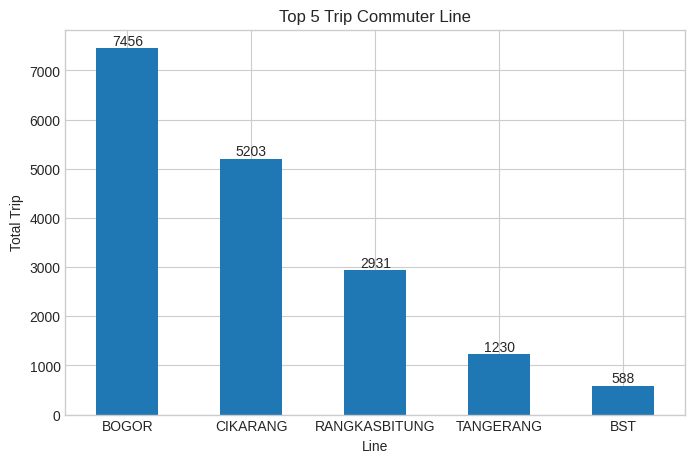

In [ ]:
plot = total.iloc[:5].plot.bar(rot=0, figsize=(8, 5))

plot.set_title("Top 5 Trip Commuter Line")

plot.set_xlabel("Line")

plot.set_ylabel("Total Trip")

plot.bar_label(plot.containers[0]);

```Commuter Line Bogor Menjadi Commuter Line Dengan Trip Terbanyak, 7.456 Trip```  
```Cikarang Menjadi Commuter Line Trip Terbanyak Kedua, 5.203 Trip```

In [ ]:
lito = origin.groupby("line")["route"].nunique()

lito = lito.sort_values(ascending=False)

lito.index = lito.index.str.replace("COMMUTER LINE", "")

lito.index = lito.index.str.strip()

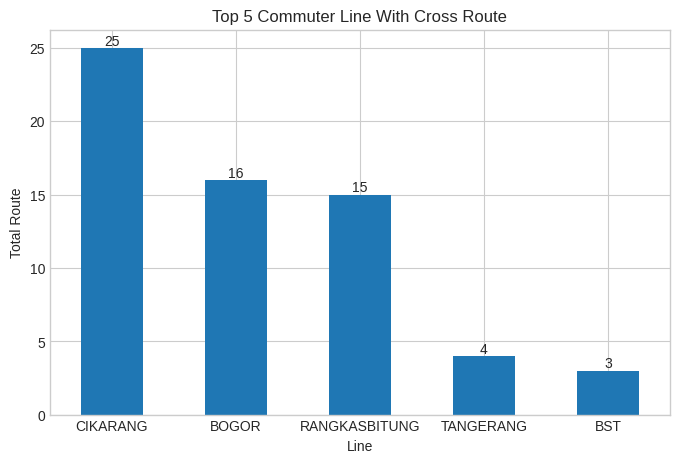

In [ ]:
plot = lito.iloc[:5].plot.bar(rot=0, figsize=(8, 5))

plot.set_title("Top 5 Commuter Line With Cross Route")

plot.set_xlabel("Line")

plot.set_ylabel("Total Route")

plot.bar_label(plot.containers[0]);

```Commuter Line Cikarang Menjadi Commuter Line Total Route Terbanyak : 25 Rute```  

In [ ]:
lito = origin.groupby("line")["route"].nunique()

lito = lito.sort_values(ascending=False)

lito.index[3]

'COMMUTER LINE TANGERANG'

In [ ]:
lito = origin.groupby("line")["route"].nunique()

lito = lito.sort_values(ascending=False)

origin[origin["line"] == lito.index[3]]["route"].unique().tolist()

['TANGERANG-DURI', 'DURI-TANGERANG', 'DURI-MANGGARAI', 'MANGGARAI-DURI']

In [ ]:
lito = origin.groupby("line")["statiun"].nunique()

lito = lito.sort_values(ascending=False)

lito.index = lito.index.str.replace("COMMUTER LINE", "")

lito.index = lito.index.str.strip()

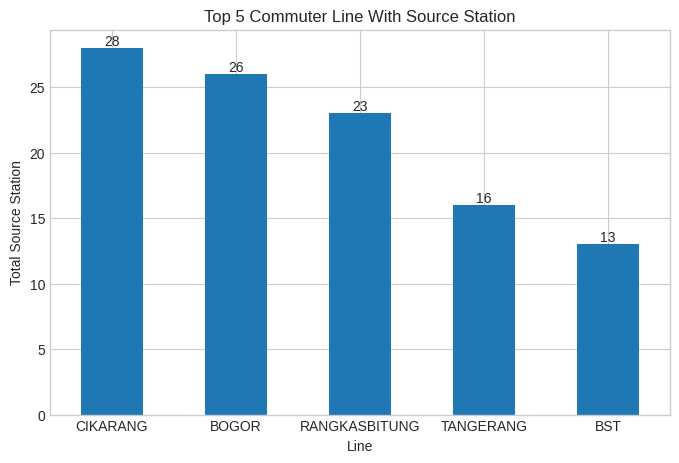

In [ ]:
plot = lito.iloc[:5].plot.bar(rot=0, figsize=(8, 5))

plot.set_title("Top 5 Commuter Line With Source Station")

plot.set_xlabel("Line")

plot.set_ylabel("Total Source Station")

plot.bar_label(plot.containers[0]);

In [ ]:
lito = origin.groupby("line")["statiun"].nunique()

lito = lito.sort_values(ascending=False)

origin[origin["line"] == lito.index[0]]["statiun"].unique().tolist()[:6]

['ANGKE', 'BEKASI', 'BEKASITIMUR', 'BUARAN', 'CIBITUNG', 'CIKARANG']

```Commuter Line Cikarang Menjadi Commuter Line Dengan Total Menerima Trip Dari 28 Statiun```  
```6 Diantaranya, Angke, Bekasi, Buaran, Cibitung, Cikarang, Bekasi Timur```  

### ```Rute General```

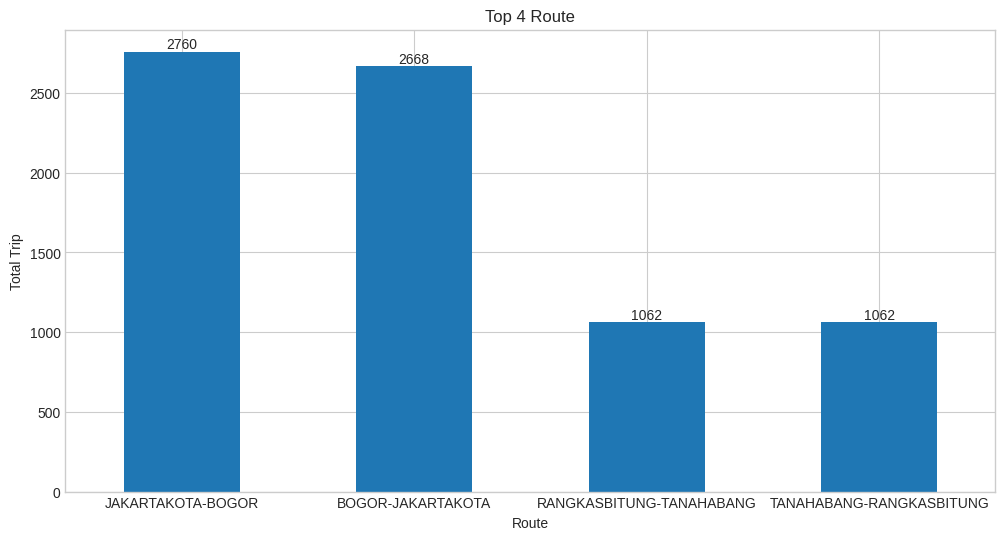

In [ ]:
rute = origin["route"].value_counts()

plot = rute.iloc[:4].plot.bar(rot=0, figsize=(12, 6))

plot.set_title("Top 4 Route")

plot.set_xlabel("Route")

plot.set_ylabel("Total Trip")

plot.bar_label(plot.containers[0]);

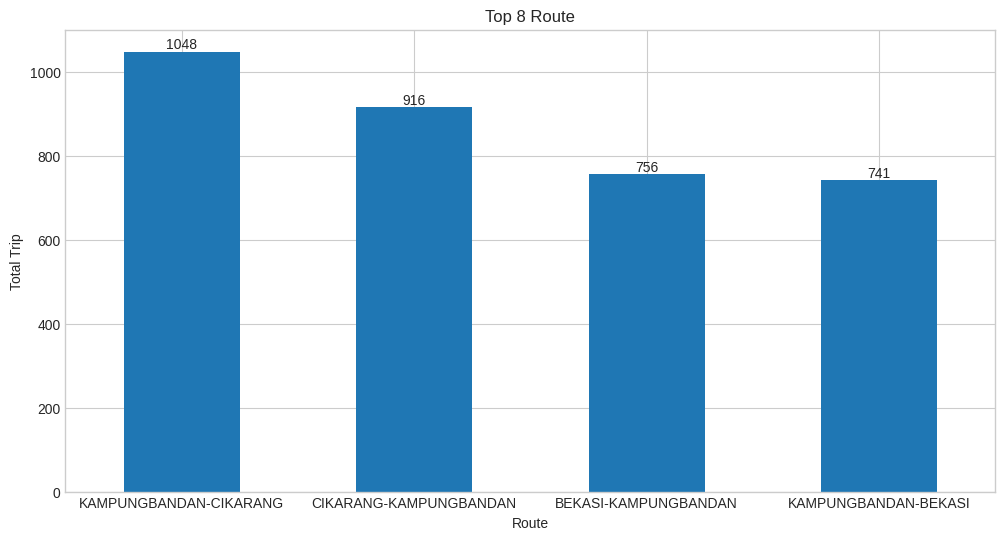

In [ ]:
plot = rute.iloc[4:8].plot.bar(rot=0, figsize=(12, 6))

plot.set_title("Top 8 Route")

plot.set_xlabel("Route")

plot.set_ylabel("Total Trip")

plot.bar_label(plot.containers[0]);

```4 Rute Terbanyak Yang Dilewati : Jakarta - Bogor, Rangkasbitung - Tanah Abang, Kampung Bandan - Cikarang, Bekasi -  Kampung Bandan```  
```Masing Masing Rute Menjadi Top 4 Rute Dengan Masing-Masing Memiliki 2 Arah Keberangkatan```  
```Contoh : Rangkasbitung - Tanah Abang, 1062 + 1062 Menjadi 2.124 Trip```

In [ ]:
rute = origin.groupby("route")[["statiun"]].nunique()

rute.sort_values("statiun", ascending=False).iloc[:5]

,statiun
route,
CIKARANG-KAMPUNGBANDAN,26
KAMPUNGBANDAN-CIKARANG,25
TAMBUN-KAMPUNGBANDAN,23
BOGOR-JAKARTAKOTA,23
JAKARTAKOTA-BOGOR,23


In [ ]:
rute.sort_values("statiun").iloc[:5]

,statiun
route,
RANGKASBITUNG-MERAK,1
DEPOK-BOJONGGEDE,2
SERPONG-PARUNGPANJANG,3
DEPOK-NAMBO,3
TANJUNGPRIUK-JAKARTAKOTA,3


In [ ]:
t = rute.sort_values("statiun").iloc[:5]

origin[origin["route"] == t.index[4]]["statiun"].unique().tolist()

['ANCOL', 'KAMPUNGBANDAN', 'TANJUNGPRIUK']

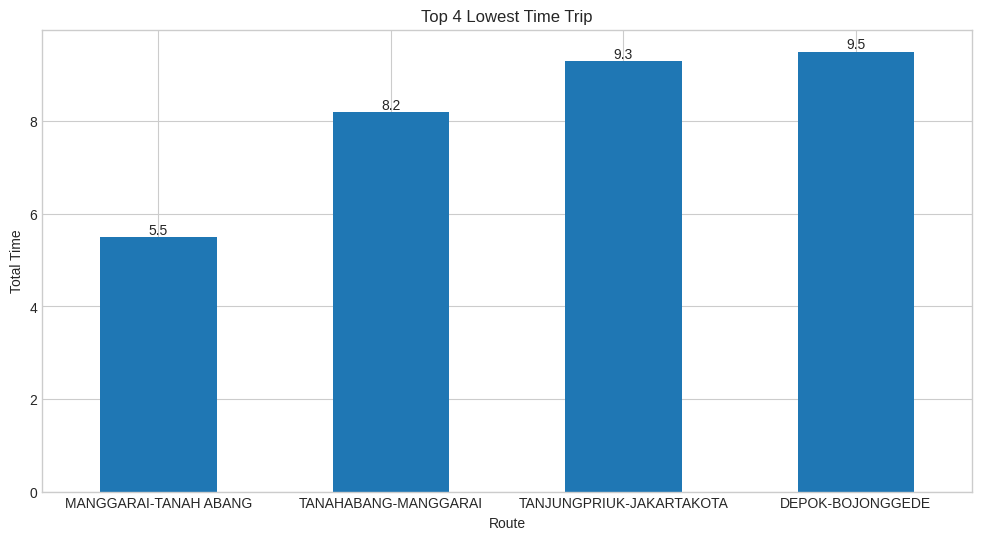

In [ ]:
rute = origin.groupby("route")["time"].mean().round(1)

plot = rute.sort_values().iloc[:4].plot.bar(rot=0, figsize=(12, 6))

plot.set_title("Top 4 Lowest Time Trip")

plot.set_xlabel("Route")

plot.set_ylabel("Total Time")

plot.bar_label(plot.containers[0]);

```4 Rute Dengan Total Durasi Tersingkat : Manggarai - Tanah Abang : 5.5  Menit dan 8.2 Menit, Diikuti Tanjung Priok - Jakarta Kota : 9.3 Menit```

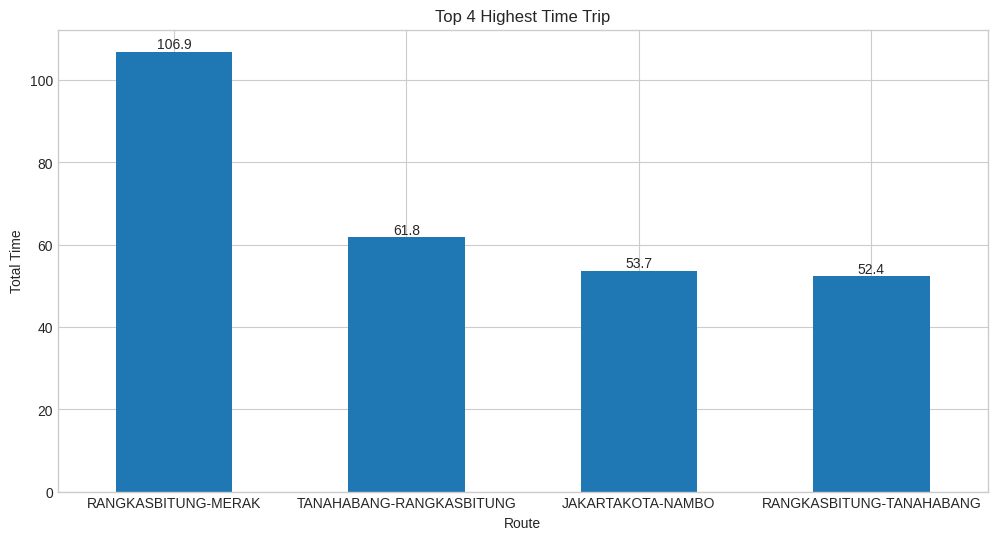

In [ ]:
plot = rute.sort_values(ascending=False).iloc[:4].plot.bar(rot=0, figsize=(12, 6))

plot.set_title("Top 4 Highest Time Trip")

plot.set_xlabel("Route")

plot.set_ylabel("Total Time")

plot.bar_label(plot.containers[0]);

```4 Rute Dengan Total Durasi Terlama : Rangkas Bitung - Pelabuhan Merak : 106  Menit```

### ```Destination General```

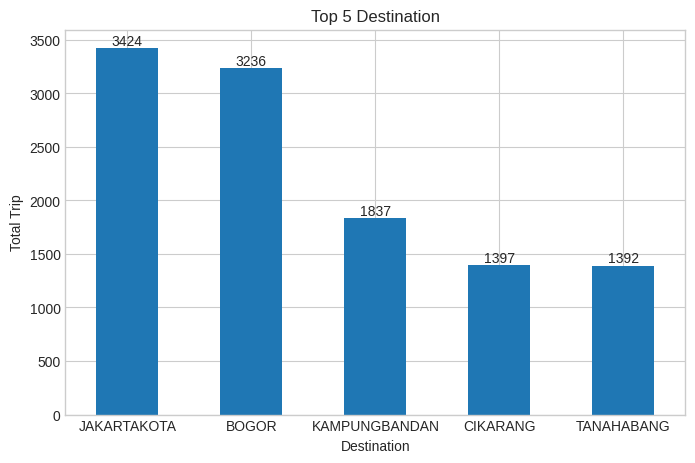

In [ ]:
tuju = origin["destination"].value_counts()

plot = tuju.iloc[:5].plot.bar(rot=0, figsize=(8, 5))

plot.set_title("Top 5 Destination")

plot.set_xlabel("Destination")

plot.set_ylabel("Total Trip")

plot.bar_label(plot.containers[0]);

```Jakarta Kota, Bogor, Kampung Bandan, Cikarang, Tanah Abang Menjadi 5 Tujuan Terbanyak```

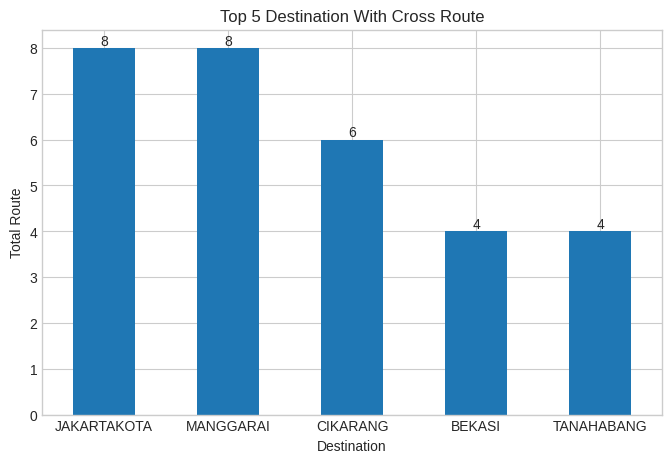

In [ ]:
tuju = origin.groupby("destination")["route"].nunique()

plot = tuju.sort_values(ascending=False).iloc[:5].plot.bar(rot=0, figsize=(8, 5))

plot.set_title("Top 5 Destination With Cross Route")

plot.set_xlabel("Destination")

plot.set_ylabel("Total Route")

plot.bar_label(plot.containers[0]);

```Jakarta Kota, Manggarai, Cikarang Menjadi Tiga Diantara 5 Statiun Dengan Total Statiun Menuju Tujuan Terbanyak```  
```Contoh : Jika Budi Mau Ke Cikarang, Budi Bisa Naik Dari 6 Statiun Berbeda```

In [ ]:
origin[origin["destination"] == "CIKARANG"]["route"].unique().tolist()[:3]

['KAMPUNGBANDAN-CIKARANG', 'ANGKE-CIKARANG', 'JAKARTAKOTA-CIKARANG']

In [ ]:
origin[origin["destination"] == "CIKARANG"]["route"].unique().tolist()[3:]

['BEKASI-CIKARANG', 'MANGGARAI-CIKARANG', 'CAKUNG-CIKARANG']

### ```Hour General```

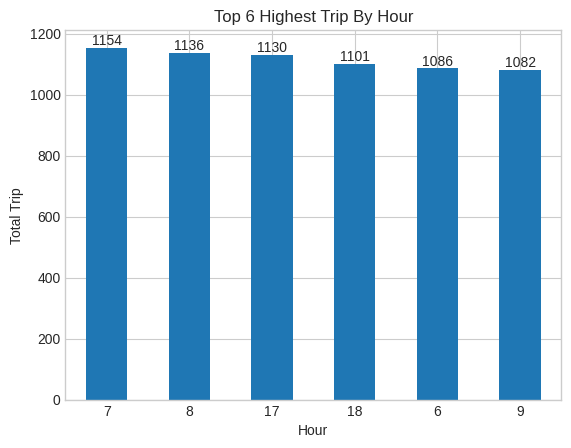

In [ ]:
jamly = origin.groupby(origin["time_estimated"].dt.hour)["id"].count()

jamly = jamly.sort_values(ascending=False)

plot = jamly.iloc[:6].plot.bar(rot=0)

plot.set_title("Top 6 Highest Trip By Hour")

plot.set_xlabel("Hour")

plot.set_ylabel("Total Trip")

plot.bar_label(plot.containers[0]);

```Jam Perjalanan Pulang Pergi Kantor / Sekolah Menjadi Total Hour Tertinggi, Dimana Pukul 7 Memiliki 1.154 Total Trip```

### ```Station General```

In [ ]:
origin["statiun"].nunique()

100

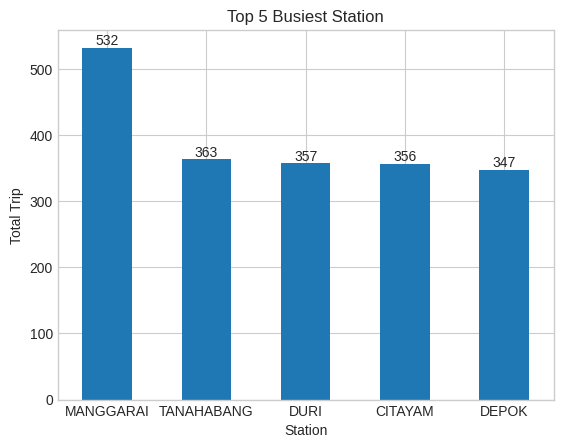

In [ ]:
sati = origin["statiun"].value_counts()

plot = sati.iloc[:5].plot.bar(title="Top 5 Busiest Station", rot=0)

plot.set_xlabel("Station")

plot.set_ylabel("Total Trip")

plot.bar_label(plot.containers[0]);

```Manggarai Menjadi Statiun Dengan Total Trip Terbanyak, Yaitu : 532 Trip```

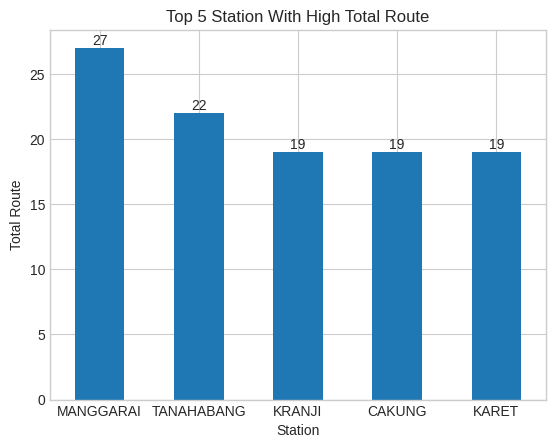

In [ ]:
satir = origin.groupby("statiun")["route"].nunique()

plot = satir.sort_values(ascending=False).iloc[:5].plot.bar(title="Top 5 Station With High Total Route", rot=0)

plot.set_xlabel("Station")

plot.set_ylabel("Total Route")

plot.bar_label(plot.containers[0]);

```Dimana Manggarai Menjadi Statiun Dengan Total Dilintasi Rute Terbanyak, Yaitu : 27 Rute Melewati Statiun Manggarai```

In [ ]:
origin[origin["statiun"] == "GROGOL"]["route"].unique().tolist()

['TANGERANG-DURI', 'DURI-TANGERANG']

### ```Final```

```Kereta Menjadi Salah Satu Moda Transportasi Vital Daerah Jabodetabek, Terutama Bogor - Jakarta dan Antar Daerah Jakarta, Statiun Seperti Manggarai, Tanah Abang Menjadi Salah Dua Dari 100 Statiun Yang Akan Mengalami 'Rush Hour' Dalam Moment Tertentu, Contoh : Manggarai, Jam Kerja (Pulang / Pergi), Tanah Abang (Hari Lebaran Idul Fitri), Penting Bagi Pemerintah Untuk Menjaga Agar Tidak Ada Keterlambatan dan Menjaga Fasilitas Stasiun dan Kereta```